In [35]:
import cubo
import xarray as xr
from sen2nbar.nbar import nbar_cubo
import spyndex
import numpy as np
from PIL import Image
from rasterio import plot
import matplotlib.pyplot as plt

In [47]:
da = cubo.create(
    lat=51.34648302388849, lon=12.371403625185186,
    collection="sentinel-2-l2a",
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"],
    start_date="2023-02-01",
    end_date="2023-12-20",
    edge_size=256,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 1}}
)
da = nbar_cubo(da)
da_grouped = da.groupby("time")
da_cleaned = da_grouped.mean(dim="time", skipna=True)
da_cleaned

c:\Users\marti\miniconda3\envs\ForestVitalityQuest\Lib\site-packages\stackstac\prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray (time: 6, band: 9, y: 256, x: 256)>
dask.array<stack, shape=(6, 9, 256, 256), dtype=float32, chunksize=(1, 1, 256, 256), chunktype=numpy.ndarray>
Coordinates: (12/19)
  * band                                     (band) <U3 'B02' 'B03' ... 'B12'
  * x                                        (x) float64 3.157e+05 ... 3.182e+05
  * y                                        (y) float64 5.693e+06 ... 5.69e+06
    s2:saturated_defective_pixel_percentage  float64 0.0
    s2:processing_baseline                   <U5 '05.09'
    sat:orbit_state                          <U10 'descending'
    ...                                       ...
    center_wavelength                        (band) float64 0.49 0.56 ... 2.19
    full_width_half_max                      (band) float64 0.098 ... 0.242
    epsg                                     int32 32633
    cubo:distance_from_center                (y, x) float64 1.815e+03 ... 1.7...
    angle                                    <U7 'Zenith'
  * time                                     (time) datetime64[ns] 2023-03-02...
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32633
    resolution:           10
    edge_size:            256
    central_lat:          51.34648302388849
    central_lon:          12.371403625185186
    central_y:            5691636.518856275
    central_x:            316943.652813161
    time_coverage_start:  2023-02-01
    time_coverage_end:    2023-12-20

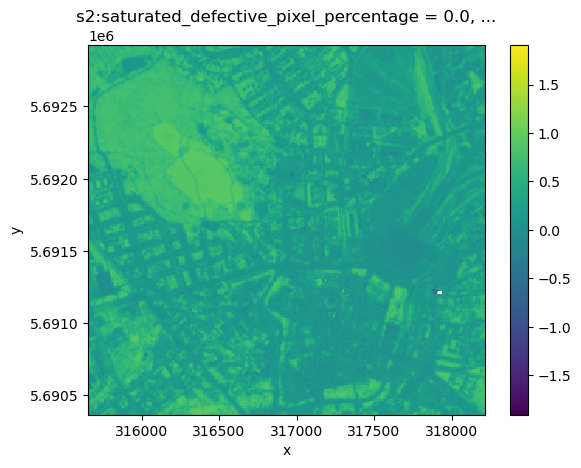

In [52]:
# "B,G,R,RE1,RE2,RE3,N,S1,S2"
lda = spyndex.computeIndex(
    index = ["NDVI"],
    params = {
        "B": da_cleaned.sel(band = "B02"),
        "G": da_cleaned.sel(band = "B03"),
        "R": da_cleaned.sel(band = "B04"),
        "RE1": da_cleaned.sel(band = "B05"),
        "RE2": da_cleaned.sel(band = "B06"),
        "RE3": da_cleaned.sel(band = "B07"),
        "N": da_cleaned.sel(band = "B08"),
        "S1": da_cleaned.sel(band = "B11"),
        "S2": da_cleaned.sel(band = "B12")
    }
)
lda[1].plot.imshow(cmap="viridis")

c:\Users\marti\miniconda3\envs\ForestVitalityQuest\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


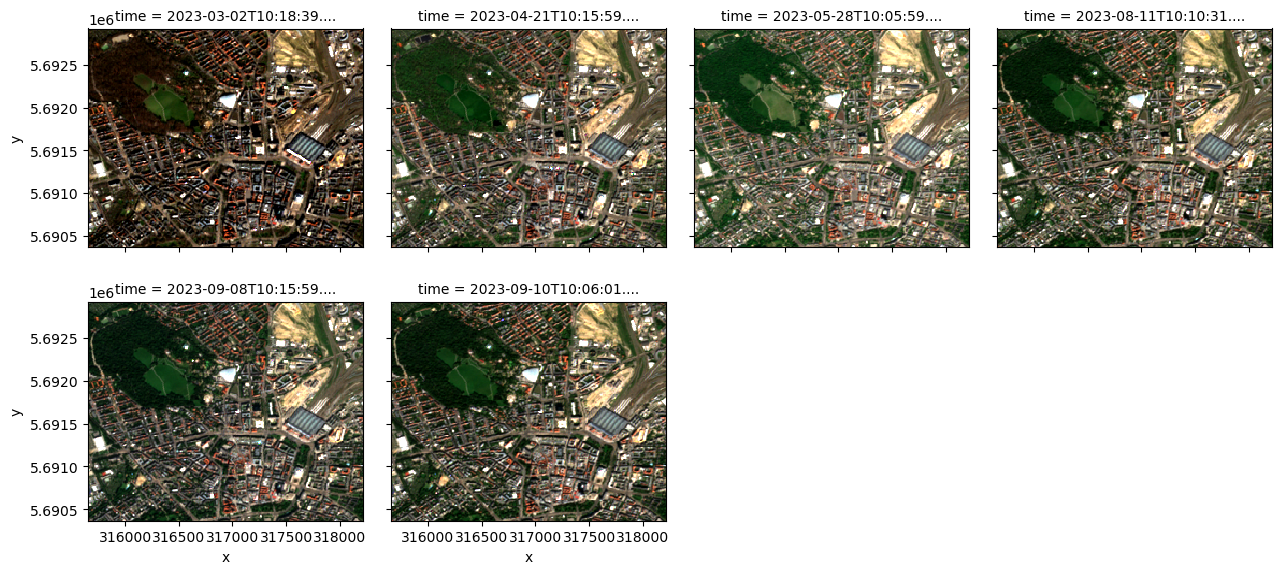

In [53]:
#da_cleaned.sel(band=["B04", "B03", "B02"]).isel(time=0).plot.imshow(vmin=0, vmax=10000)
da_cleaned.sel(band=["B04", "B03", "B02"]).plot.imshow(robust=True, col="time", col_wrap=4)
#tt = Image.fromarray(((da_cleaned.sel(band=["B04", "B03", "B02"]).isel(time=0)/3000).clip(0,1)*255).astype(np.uint8).transpose("y", "x", "band").values)
#tt.save("test.png")
#(da_cleaned.sel(band=["B04", "B03", "B02"]).isel(time=0)/10000).clip(0,1).plot.imshow(robust=True)